## DSCI 100 PROJECT PROPOSAL 
- Bryan Park
- add name
- add name
- add name 

## INTRODUCTION 

add text

## PRELIMINARY EXPLORATORY DATA ANALYSIS

In [43]:
library(tidyverse)
library(tidymodels)
set.seed(1)


── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Use suppressPackageStartupMessages() to eliminate package startup messages



In [58]:
heart_disease <- read_csv("data/disease_dataset.csv")

head(heart_disease)


Rows: 1000 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): patientid, age, gender, chestpain, restingBP, serumcholestrol, fas...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1
148462,24,1,1,173,0,0,0,161,0,4.7,3,2,1


In [51]:
heart_disease <- heart_disease |> 
    mutate(test_result = as_factor(target)) |> 
    mutate(test_result = fct_recode(test_result, "Positive" = "1", "Negative" = "0")) 

head(heart_disease) 

patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target,test_result
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1,Positive
119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0,Negative
119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0,Negative
132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1,Positive
146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1,Positive
148462,24,1,1,173,0,0,0,161,0,4.7,3,2,1,Positive


In [57]:
heart_disease <- heart_disease |> 
    select(age,gender,restingBP,maxheartrate, test_result)

heart_disease_split <- initial_split(heart_disease, prop = 0.75, strata = test_result)
heart_disease_train <- training(heart_disease_split)
heart_disease_test <- testing(heart_disease_split)

head(heart_disease_train)

age,gender,restingBP,maxheartrate,test_result
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
40,1,94,115,Negative
27,1,129,192,Negative
59,1,98,117,Negative
58,1,170,170,Negative
65,1,200,194,Negative
24,0,136,91,Negative


We will be training our classification model using 75% of our original dataset. Our response variable will be the test_result, which shows wether the patient was positive or negative for any heart disease. The predictors that we will be using are age, gender (0 indicating female and 1 indicating male), resting blood pressure and maximum heart rate. 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


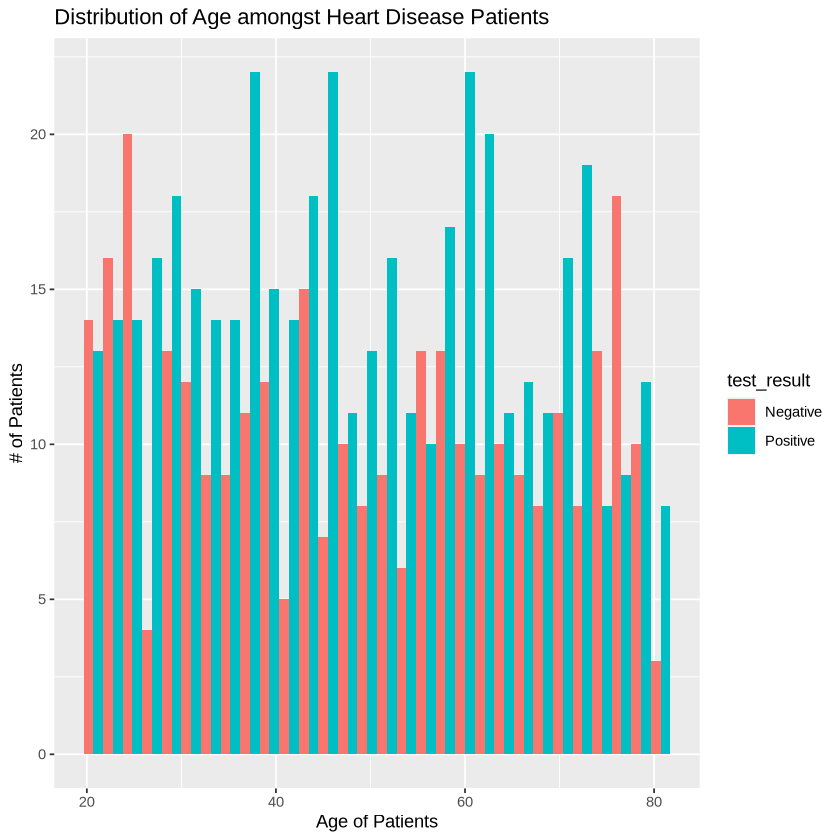

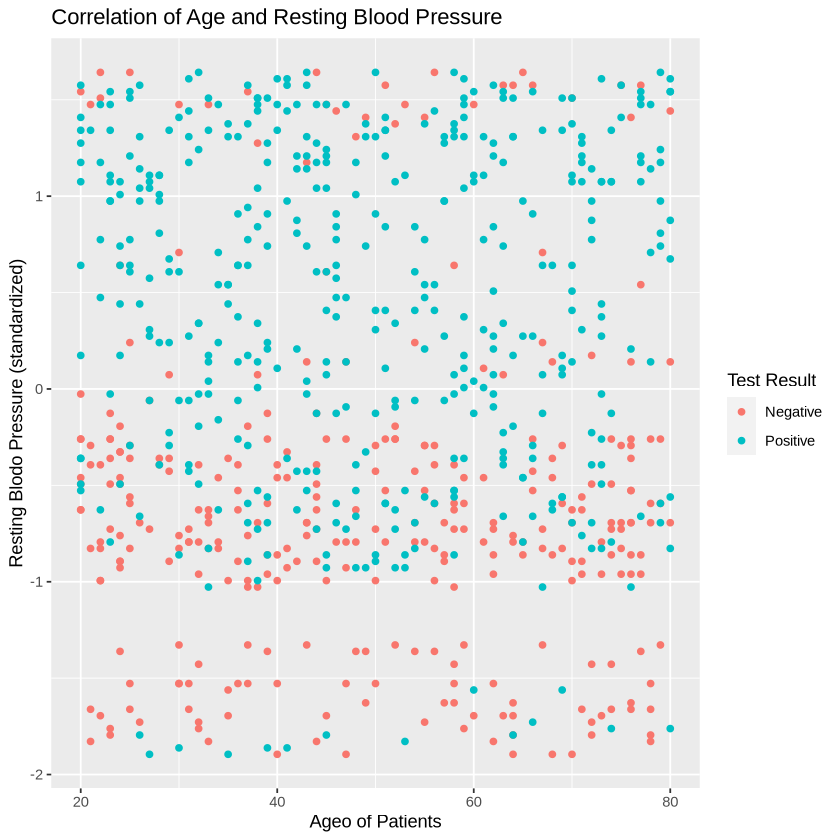

In [85]:
hd_recipe <- recipe(test_result ~ age + gender + restingBP + maxheartrate, data = heart_disease_train) |> 
    step_scale(maxheartrate, restingBP) |>
    step_center(maxheartrate, restingBP) |>
    prep()

scaled_hd <- bake(hd_recipe, heart_disease_train)

sample_plot <- scaled_hd |> 
    ggplot(aes(x = age, fill = test_result)) + 
    geom_histogram(position = "dodge") +
    labs(x = "Age of Patients", y = "# of Patients", color = "Test Result", title = "Distribution of Age amongst Heart Disease Patients")

sample_plot_2 <- scaled_hd |> 
    ggplot(aes(x = age, y = restingBP, color = test_result)) + 
    geom_point() + 
    labs(x= "Ageo of Patients", y = "Resting Blodo Pressure (standardized)", color = "Test Result", title = "Correlation of Age and Resting Blood Pressure")

sample_plot
sample_plot_2 